# Introduction to Naive Bayes


Naive Bayes is a simple but surprisingly powerful algorithm for predictive modeling. In machine learning we are often interested in selecting the best hypothesis (h) given data (d).
In a classification problem, our hypothesis (h) may be the class to assign for a new data instance
(d). One of the easiest ways of selecting the most probable hypothesis given the data that we
have that we can use as our prior knowledge about the problem. Bayes’ Theorem provides a
way that we can calculate the probability of a hypothesis given our prior knowledge. Bayes’
Theorem is stated as:
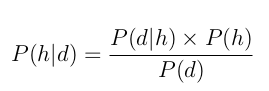
    
    
Where:
* P (h|d) is the probability of hypothesis h given the data d. This is called the posterior
probability.
* P (d|h) is the probability of data d given that the hypothesis h was true.
* P (h) is the probability of hypothesis h being true (regardless of the data). This is called
the prior probability of h.
* P (d) is the probability of the data (regardless of the hypothesis).


We are interested in calculating the posterior probability of P (h|d) from
the prior probability p(h) with P (D) and P (d|h). After calculating the posterior probability for
a number of different hypotheses, you can select the hypothesis with the highest probability.
This is the maximum probable hypothesis and may formally be called the maximum a posteriori
(MAP) hypothesis. This can be written as:

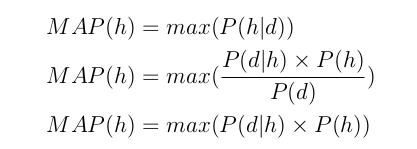

The P (d) is a normalizing term which allows us to calculate the probability. We can drop
it when we are interested in the most probable hypothesis as it is constant and only used to
normalize. Back to classification, if we have an even number of instances in each class in our
training data, then the probability of each class (e.g. P (h)) will be the same value for each class
(e.g. 0.5 for a 50-50 split). Again, this would be a constant term in our equation and we could
drop it so that we end up with:

    MAP(h) = max(P(d|h))
    
    
    
Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification
problems. The technique is easiest to understand when described using binary or categorical
input values. It is called naive Bayes or idiot Bayes because the calculation of the probabilities
for each hypothesis are simplified to make their calculation tractable. Rather than attempting to
calculate the values of each attribute value P (d1, d2, d3|h), they are assumed to be conditionally
independent given the target value and calculated as P (d1|h) × P (d2|h) and so on. This is a
very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact.
Nevertheless, the approach performs surprisingly well on data where this assumption does not
hold.


The representation for naive Bayes is probabilities. A list of probabilities is stored to file for a
learned naive Bayes model. This includes:
* Class Probabilities: The probabilities of each class in the training dataset.
* Conditional Probabilities: The conditional probabilities of each input value given each
class value.


Learning a naive Bayes model from your training data is fast. Training is fast because only the
probability of each class and the probability of each class given different input (x) values need
to be calculated. No coefficients need to be fitted by optimization procedures.


The class probabilities are simply the frequency of instances that belong to each class divided
by the total number of instances. For example in a binary classification the probability of an
instance belonging to class 1 would be calculated as:

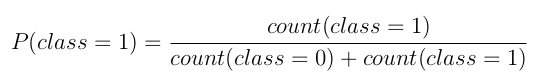


The conditional probabilities are the frequency of each attribute value for a given class value
divided by the frequency of instances with that class value. . For example, if a weather attribute
had the values sunny and rainy and the class attribute had the class values go-out and
stay-home, then the conditional probabilities of each weather value for each class value could
be calculated as:

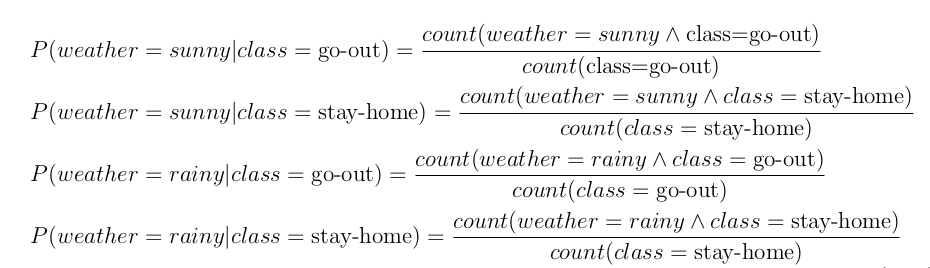


Given a naive Bayes model, you can make predictions for new data using Bayes theorem.

MAP(h) = max(P (d|h) × P (h))


Using our example above, if we had a new instance with the weather of sunny, we can
calculate:

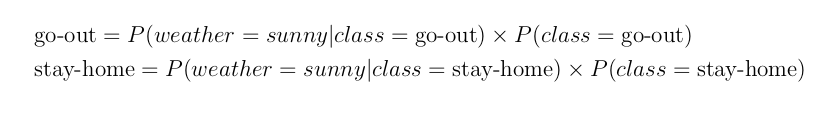

Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian
distribution. This extension of naive Bayes is called Gaussian Naive Bayes. Other functions can
be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is
the easiest to work with because you only need to estimate the mean and the standard deviation
from your training data.

Above, we calculated the probabilities for input values for each class using a frequency. With
real-valued inputs, we can calculate the mean and standard deviation of input values (x) for
each class to summarize the distribution. This means that in addition to the probabilities for
each class, we must also store the mean and standard deviations for each input variable for each
class.

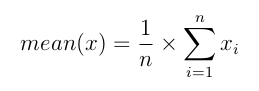

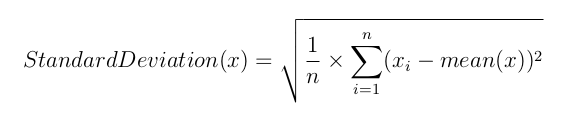

Where n is the number of instances and x are the values for an input variable in your training
data.

Probabilities of new x values are calculated using the Gaussian Probability Density Function
(PDF). When making predictions these parameters can be plugged into the Gaussian PDF with
a new input for the variable, and in return the Gaussian PDF will provide an estimate of the
probability of that new input value for that class.

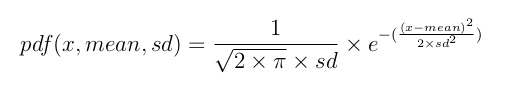

Where pdf (x) is the Gaussian PDF, mean and sd are the mean and standard deviation
calculated above, π is the numerical constant PI, e is the numerical constant Euler’s number
raised to power and x is the input value for the input variable. We can then plug in the
probabilities into the equation above to make predictions with real-valued inputs. For example,
adapting one of the above calculations with numerical values for weather and car:

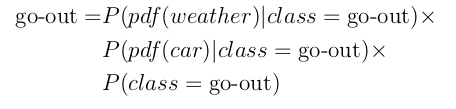



In [1]:
# Gaussian NB from scratch

In [2]:
# Example of Naive Bayes implemented from Scratch in Python
import csv
import random
import math
from random import seed
from random import randrange
from csv import reader
from math import exp

In [3]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [4]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [5]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [6]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [7]:
# separated = {}
# for i in range(len(dataset)):
#     vector = dataset[i]
# #     print(vector)
#     if (vector[-1] not in separated):
#         separated[vector[-1]] = []
#     separated[vector[-1]].append(vector)
# print(separated)

In [8]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [9]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [10]:
# separated = separateByClass(dataset)
# print(separated.keys())
# summaries = {}
# for classValue, instances in separated.items():
#     summaries[classValue] = summarize(instances)
# print(summaries)

In [11]:
d = {}
d['a'] = 1
d

{'a': 1}

In [12]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [13]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [15]:
# probabilities = {}
# for classValue, classSummaries in summaries.items():
#     probabilities[classValue] = 1
#     for i in range(len(classSummaries)):
#         mean, stdev = classSummaries[i]
#         x = testSet[0][i]
#         probabilities[classValue] *= calculateProbability(x, mean, stdev)
# print(probabilities)

In [16]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [17]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [18]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [19]:
def main():
    filename = 'diabetes.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    dataset = dataset[1:]
    for i in range(len(dataset[0])):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ', accuracy)

In [20]:
# filename = 'diabetes.csv'
# splitRatio = 0.70
# dataset = load_csv(filename)
# dataset = dataset[1:]
# for i in range(len(dataset[0])):
#     str_column_to_float(dataset, i)
# trainingSet, testSet = splitDataset(dataset, splitRatio)
# # print(len(trainingSet))
# # print(len(testSet))
# # prepare model
# summaries = summarizeByClass(trainingSet)
# predictions = getPredictions(summaries, testSet)

In [21]:
main()

Accuracy:  77.48917748917748


In [ ]:
# Gaussian NB using sklearn

In [23]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
cols = list(df.columns)
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [27]:
X = df[cols[:-1]]
y = df[cols[-1:]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [47]:
X_test.shape

(154, 8)

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test
accuracy = accuracy_score(y_test, pred)
print("The {} model accuracy is".format(model),accuracy)
print (model.predict([[7,180,56,31,0,30,0.6,45]]))

The GaussianNB(priors=None, var_smoothing=1e-09) model accuracy is 0.7662337662337663
[1]


/home/omkar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:725: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
